<div class="alert alert-block alert-info">
<center>Métodos Numéricos</center>
<center>PROJETO I</center>
<center>ALUNO: Jhonatan Guilherme Oliveira Pereira</center>
</div>

### Parte 1: Implementação do Algoritmo

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.stats import norm
import time

In [23]:
xtol = 1e-4

In [24]:
def algorithm(f, der, a: float, b: float, esp: float=xtol, n: int=500):
  """
  Args:
    f (function): transcendental equation
    der (functiom): derivative function of f
    a, b (float): initial approximation of the root
    esp (float): relative error
    n (int): number of iteractions required
  """
  if f(a) * f(b) > 0:
    raise Exception("No root.")
  
  previous_x = b
  
  for iteration in range(n):
    x_a = f(a)
    x_b = f(b)
    dx_a = der(a)

    x = a - (x_a / (2 * dx_a)) * ((x_a - x_b + (a - b) * dx_a) / (x_a - x_b))

    error = abs((x - previous_x) / x)
    if esp > error: break

    previous_x = x
    
    check_a = f(x) * x_a
    check_b = f(x) * x_b
    if check_a < 0: x, a = a, x
    elif check_b < 0: b = x

    if np.isclose(dx_a, 0, atol=esp):
      a, b = b, a
  
  return x, iteration + 1


In [25]:
func = lambda x: x * np.exp(x) - np.cos(x)
der = lambda x: np.exp(x) + x * np.exp(x) + np.sin(x)

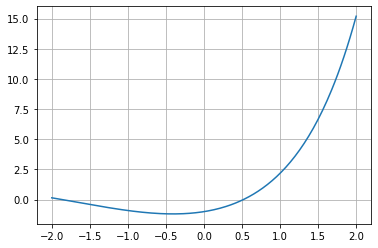

In [26]:
x = np.linspace(-2, 2, 200)
plt.plot(x, func(x))
plt.grid()

In [34]:
opt.root_scalar(func, method='bisect', bracket=[0, 1], xtol=xtol)

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 14
           root: 0.51776123046875

In [35]:
opt.root_scalar(func, method='secant', x0=0, x1=1, xtol=xtol)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 0.5177573707542169

In [33]:
opt.root_scalar(func, fprime=der, method='newton', x0=0, xtol=xtol)

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 0.5177573636824586

In [27]:
algorithm(f=func, der=der, a=0, b=1)

0.5467270243544884 - 3


In [36]:
func2 = lambda x: x * np.log10(x) - 1.2
der2 = lambda x: np.log10(x) + (1 / np.log(10))

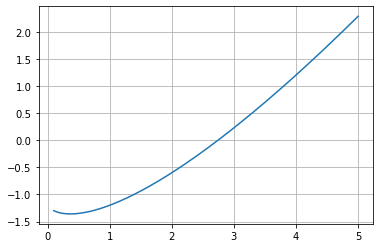

In [37]:
x = np.linspace(0.1, 5, 200)
plt.plot(x, func2(x))
plt.grid()

In [42]:
opt.root_scalar(func2, method='bisect', bracket=[2, 3], xtol=xtol)

      converged: True
           flag: 'converged'
 function_calls: 16
     iterations: 14
           root: 2.74066162109375

In [43]:
opt.root_scalar(func2, method='secant', x0=2, x1=3, xtol=xtol)

      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: 2.7406460955658867

In [44]:
opt.root_scalar(func2, fprime=der2, x0=2.5, method='newton', xtol=xtol)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 3
           root: 2.740646095974572

In [45]:
algorithm(func2, der2, 2, 3)

(2.740971296543365, 3)

### Parte 2: Aplicação em Problema Real

In [46]:
S = 7.01
K = 7.5
r = 0.0225
T = 6/252

In [48]:
stdnormal = norm(loc=0, scale=1)
phi = lambda x: stdnormal.cdf(x)

In [49]:
def c(x):
  d1 = (np.log(S / K) + (r + x ** 2 / 2) * T) / (x * np.sqrt(T))
  d2 = d1 - x * np.sqrt(T)
  
  return S * phi(d1) - K * np.exp(-r * T) * phi(d2)

In [50]:
def cprime(x):
  d1 = (np.log(S / K) + (r + x ** 2 / 2) * T) / (x * np.sqrt(T))
  d2 = d1 - x * np.sqrt(T)
  A = (np.log(S / K) + (r + x ** 2 / 2) * T) / (np.sqrt(T) * x ** 2)

  return S * (np.exp(-d1 ** 2 / 2) / np.sqrt(2 * np.pi)) * (np.sqrt(T) - A) + K * np.exp(-(r * T + d2 ** 2 / 2)) * A / np.sqrt(2 * np.pi)

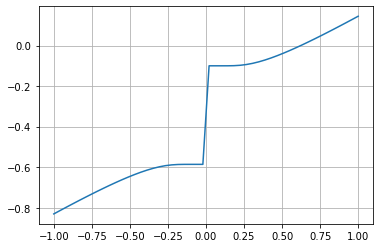

In [51]:
x = np.linspace(-1, 1, 50)
plt.plot(x, c(x) - 0.1)
plt.grid()

In [52]:
func3 = lambda x: c(x) - 0.1
opt.root_scalar(func3, fprime=cprime, x0=1, method='newton', xtol=xtol)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 0.6231138398099891

In [55]:
algorithm(func3, der=cprime, a=0.25, b=1, esp=xtol)

(0.6372903582130485, 3)